<a href="https://colab.research.google.com/github/MeenTers/Project/blob/main/Project_SI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import torch
from torch import nn, load, utils
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets, transforms, models
from torchvision.models.vgg import model_urls
from os import path, listdir
model_urls['vgg19'] = model_urls['vgg19'].replace('https://', 'http://')

In [3]:
from scipy.spatial import distance_matrix
from scipy.spatial import distance

In [4]:
import pandas as pd

# Prepearing the model

In [5]:
class VGG:
	def __init__(self):
		model = models.vgg19(pretrained=True, progress=True)
		model.classifier = nn.Sequential(*list(model.classifier.children())[:3])
		self.model = model.cuda().eval()

	def __call__(self, x):
		return self.model(x)

In [6]:
vgg = VGG()

Downloading: "http://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

# Features Extraction

In [7]:
def get_features(model, loader):
    features = []
    with torch.no_grad():
        for batch, _ in tqdm(loader):
            if torch.cuda.is_available():
                batch = batch.cuda()
            b_features = model(batch).detach().cpu().numpy()
            for f in b_features:
                features.append(f)

    return features

# Loading the data

In [8]:
def get_dataset(images_path):
  transform = transforms.Compose([
    transforms.Resize(size=32),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
  ])

  dataset = datasets.ImageFolder(images_path, transform=transform)
  loader = utils.data.DataLoader(dataset, batch_size=100, shuffle=False, num_workers=1, pin_memory=True)
  return dataset, loader

# Test multi-view image

In [9]:
car_dataset , car_loader = get_dataset(r'/content/drive/MyDrive/Project_si/car_model/')

In [10]:
damage_dataset , damage_loader = get_dataset(r'/content/drive/MyDrive/Project_si/model_damage/')

In [11]:
car_base = get_features(model=vgg,loader=car_loader)

100%|██████████| 1/1 [00:01<00:00,  1.14s/it]


In [12]:
len(car_base[0])

4096

In [13]:
car_base[0]

array([0.      , 0.      , 3.960284, ..., 0.      , 0.      , 0.      ],
      dtype=float32)

In [14]:
car_damage = get_features(model=vgg,loader=damage_loader)

100%|██████████| 1/1 [00:00<00:00,  1.42it/s]


In [15]:
len(car_damage[0])

4096

# Distance

In [16]:
car_image = '/content/drive/MyDrive/Project_si/car_model/ID1/ID1(F).png'
damage_image = '/content/drive/MyDrive/Project_si/model_damage/ID1'

In [17]:
distance.euclidean(car_base[1], car_damage[1])

13.258048057556152

In [18]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [19]:
# !pip install -U --pre matplotlib  
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

In [20]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2

In [24]:
image1 = cv2.imread('/content/ID1 F.png')
image2 = cv2.imread('/content/ID1 F1.png')

Text(375, 450, '28.069')

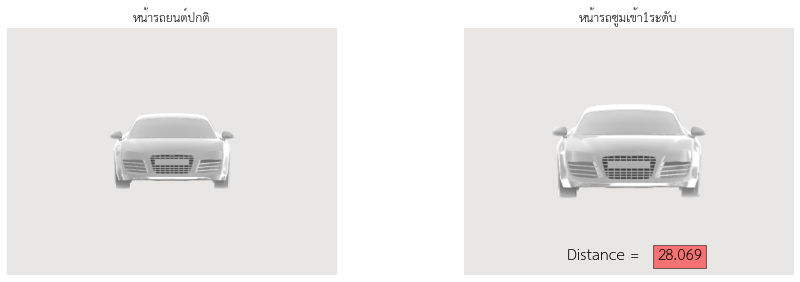

In [107]:
# create figure
fig = plt.figure(figsize=(15, 10))
# setting values to rows and column variables
rows = 2
columns = 2
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
# showing image
plt.imshow(image1)
plt.axis('off')
plt.title("หน้ารถยนต์ปกติ")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)  
# showing image
plt.imshow(image2)
plt.axis('off')
plt.title('หน้ารถซูมเข้า1ระดับ')
plt.text(200,450,'Distance = ',fontsize = 15)
plt.text(375, 450,round(id1[0],3), fontsize =15,
         bbox = dict(facecolor = 'red', alpha = 0.5))

In [110]:
def viz_car(img1,img2,distance,text1,text2):
    fig = plt.figure(figsize=(15, 10))
    rows = 2
    columns = 2   
    fig.add_subplot(rows, columns, 1)
    plt.imshow(img1)
    plt.axis('off')
    plt.title(text1)
    fig.add_subplot(rows, columns, 2)  
    plt.imshow(img2)
    plt.axis('off')
    plt.title(text2)
    plt.text(200,450,'Distance = ',fontsize = 15)
    plt.text(375, 450,round(distance,3), fontsize = 15,
              bbox = dict(facecolor = 'red', alpha = 0.5))

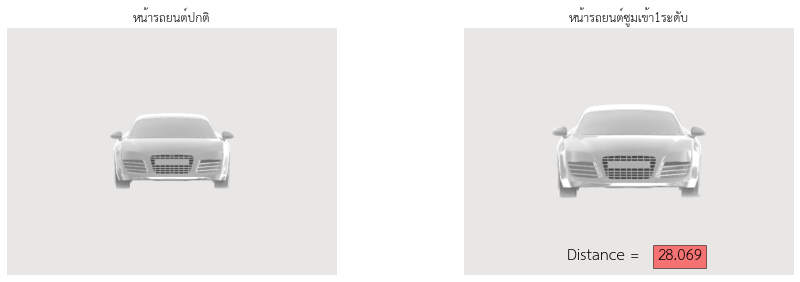

In [111]:
viz_car(image1,image2,id1[0],'หน้ารถยนต์ปกติ','หน้ารถยนต์ซูมเข้า1ระดับ')

# compute distance


In [34]:
def get_euclidean(basecar,diff_view):
    A = []
    for i in range(len(diff_view)):
        x = distance.euclidean(basecar[0],diff_view[i])
        A.append(x)
    return(A)

# ID1

In [31]:
ID1B_dataset, ID1B_loader = get_dataset(r'/content/drive/MyDrive/Project_si/Test_Dist/Base_car/ID1')
ID1_dataset,ID1_loader    = get_dataset(r'/content/drive/MyDrive/Project_si/Test_Dist/different_view/ID1')

In [32]:
base_id1 = get_features(vgg,ID1B_loader)
car_id1  = get_features(vgg,ID1_loader)

100%|██████████| 1/1 [00:00<00:00,  1.21it/s]


In [35]:
id1 = get_euclidean(base_id1,car_id1)
id1l = ['id1F','id1F','id1F','id1F']
id1l1 = ['id1F1','id1F2','id1F3','id2F']

In [39]:
id1[0]

28.068737030029297

In [37]:
dict1 = {'Model1':id1l, 'Model2':id1l1, 'Distance':id1}

# เปรียบเทียบระยะรถ ID1

In [38]:
df1 = pd.DataFrame(dict1)
df1

,Model1,Model2,Distance
0,id1F,id1F1,28.068737
1,id1F,id1F2,36.003323
2,id1F,id1F3,32.046677
3,id1F,id2F,117.247307


# ID2


In [ ]:
ID2B_dataset, ID2B_loader = get_dataset(r'/content/drive/MyDrive/Project_si/Test_Dist/Base_car/ID2')
ID2_dataset,ID2_loader    = get_dataset(r'/content/drive/MyDrive/Project_si/Test_Dist/different_view/ID2')

In [ ]:
base_id2 = get_features(vgg,ID2B_loader)
car_id2  = get_features(vgg,ID2_loader)

In [ ]:
id2 = get_euclidean(base_id2,car_id2)
id2l = ['id2F','id2F','id2F','id2F']
id2l1 = ['id1F','id2F1','id2F2','id2F3']

In [ ]:
dict2 = {'Model1':id2l, 'Model2':id2l1, 'Distance':id2}

In [ ]:
df2 = pd.DataFrame(dict2)
df2

# ID3

In [ ]:
ID3B_dataset, ID3B_loader = get_dataset(r'/content/drive/MyDrive/Project_si/Test_Dist/Base_car/ID3')
ID3_dataset,ID3_loader    = get_dataset(r'/content/drive/MyDrive/Project_si/Test_Dist/different_view/ID3')

In [ ]:
base_id3 = get_features(vgg,ID3B_loader)
car_id3  = get_features(vgg,ID3_loader)

In [ ]:
id3 = get_euclidean(base_id3,car_id3)
id3l = ['id3F','id3F','id3F','id3F']
id3l1 = ['id2F','id3F1','id3F2','id3F3']

In [ ]:
dict3 = {'Model1':id3l, 'Model2':id3l1, 'Distance':id3}

In [ ]:
df3 = pd.DataFrame(dict3)
df3

# ID4

In [ ]:
ID4B_dataset, ID4B_loader = get_dataset(r'/content/drive/MyDrive/Project_si/Test_Dist/Base_car/ID4')
ID4_dataset,ID4_loader    = get_dataset(r'/content/drive/MyDrive/Project_si/Test_Dist/different_view/ID4')

In [ ]:
base_id4 = get_features(vgg,ID4B_loader)
car_id4  = get_features(vgg,ID4_loader)

In [ ]:
id4 = get_euclidean(base_id4,car_id4)
id4l = ['id4F','id4F','id4F','id4F']
id4l1 = ['id3F','id4F1','id4F2','id4F3']

In [ ]:
dict4 = {'Model1':id4l, 'Model2':id4l1, 'Distance':id4}

In [ ]:
df4 = pd.DataFrame(dict4)
df4

# รวมตาราง

In [ ]:
total_df = pd.concat([df1,df2,df3,df4])
total_df